In [208]:
import cmath
import math
import numpy as np
import matplotlib.pyplot  as plt

pi = 3.1415
epsilon = 8.8542e-12

In [251]:
class Mom():
  def __init__(self,L,M,N,a):

    self.L = L
    self.M = M
    self.N = N
    self.a = a
    self.DELTA = L / N
    self.z = np.linspace(-(L/2), (L/2), N)
    self.k = 2*pi/L
    self.omega = self.k*299792458
    self.I = None
    self.impedance = None

  def set(self,L,M,N,a):
    self.L = L
    self.M = M
    self.N = N
    self.a = a
    self.DELTA = L / N
    self.z = np.linspace(-(L/2), (L/2), N)
    self.k = 2*pi/L
    self.omega = k*299792458

  def V(self):
    v = self.omega*epsilon*-1j
    return np.full([self.M,1],v)

  def psi(self,m,n):

    if m!=n:
      m= math.ceil(m)
      n= math.ceil(n)
      if m >=self.M:
        m = m-1
      if n >= self.N:
        n = n-1
      x1 = self.k*cmath.sqrt( (self.z[m] - self.z[n])**2 + self.a**2 )*-1j
      x2 = 4*pi*cmath.sqrt( (self.z[m] - self.z[n])**2 + self.a**2 )
      return (cmath.e ** x1) / (x2)

    else:
      return (1/(2*pi*self.DELTA)) * (cmath.log(self.DELTA/self.a)) - (1/(4*pi))*self.k*1j

  def phi(self,m,n):
    h = 0.5
    return (self.psi(m-h,n-h) + self.psi(m+h,n+h) - self.psi(m-h,n+h) - self.psi(m+h,n-h))

  def A(self,m,n):
    return (self.DELTA*self.DELTA*self.psi(m,n))

  def Z(self,m,n):
    return (self.k*self.k*self.A(m,n) + self.phi(m,n))

  def impedance_matrix(self):
    z_mn = np.full((self.M, self.N), 0+1j)
    for i in range(0,N):
      for j in range(0,M):
        z_mn[j][i] = self.Z(j,i)
    return z_mn

  def solve(self):
    z_mn = self.impedance_matrix()
    v_m = self.V()
    self.I = np.linalg.solve(z_mn, v_m)

    print("****************")
    print(self.I.shape)
    print(v_m.shape)

    print("********************")
    one = np.full([self.M,1],1)
    self.impedance = np.linalg.lstsq(one,self.I)
    #print(self.impedance.shape)
    return self.I,self.impedance[0], self.z

****************
(1, 1)
(1, 1)
********************


<ipython-input-251-40b59c7189d4>:73: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.impedance = np.linalg.lstsq(one,self.I)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


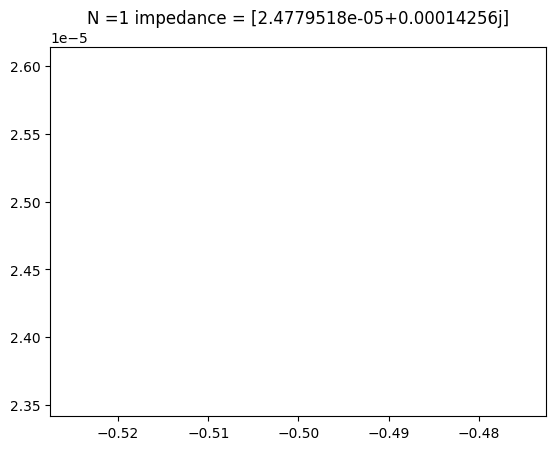

****************
(3, 1)
(3, 1)
********************


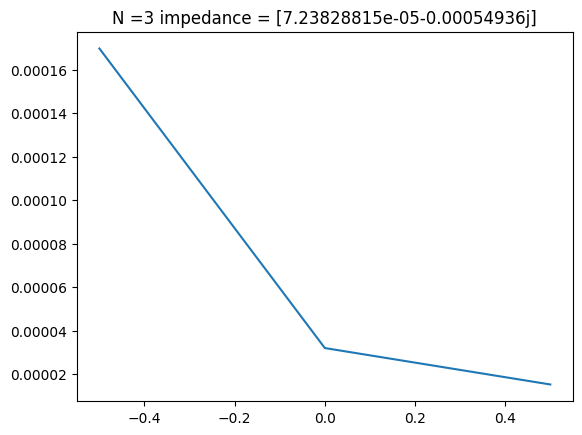

****************
(5, 1)
(5, 1)
********************


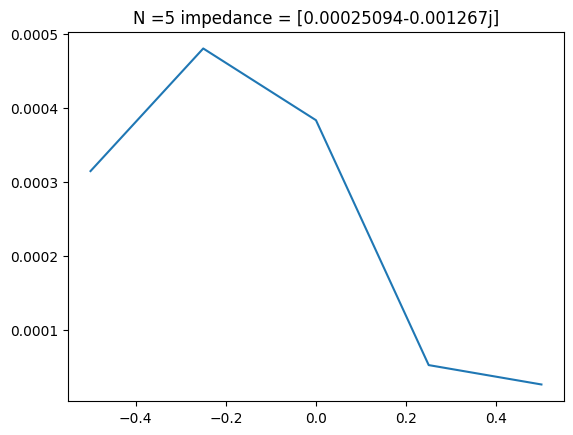

****************
(7, 1)
(7, 1)
********************


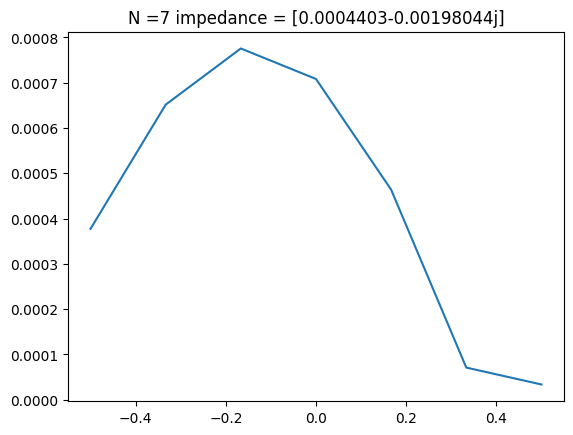

****************
(9, 1)
(9, 1)
********************


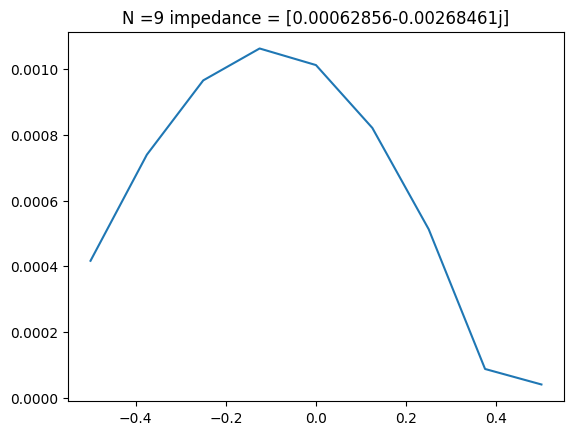

****************
(11, 1)
(11, 1)
********************


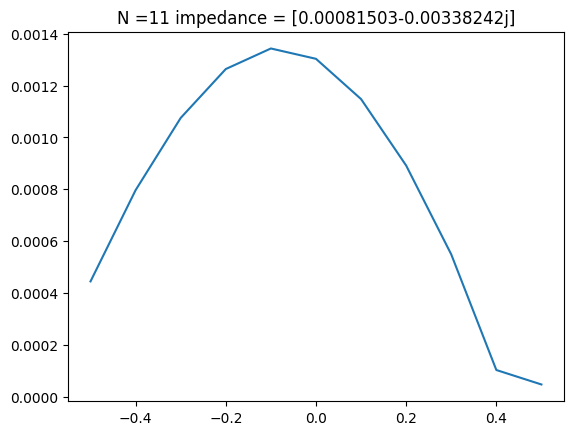

****************
(13, 1)
(13, 1)
********************


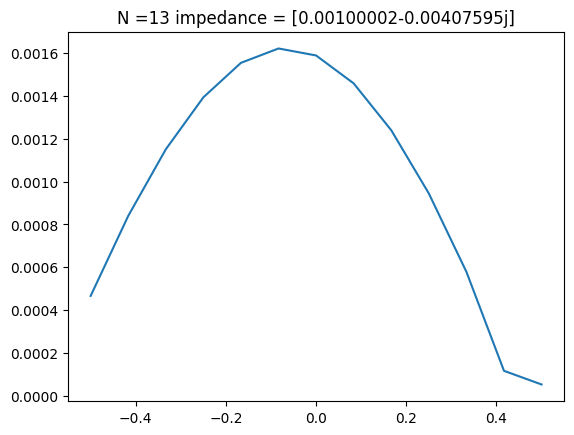

****************
(15, 1)
(15, 1)
********************


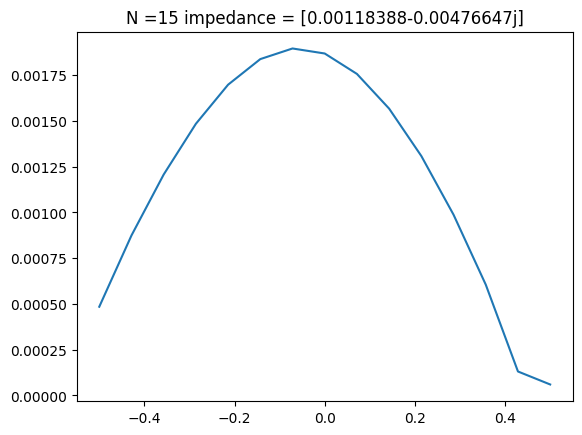

****************
(17, 1)
(17, 1)
********************


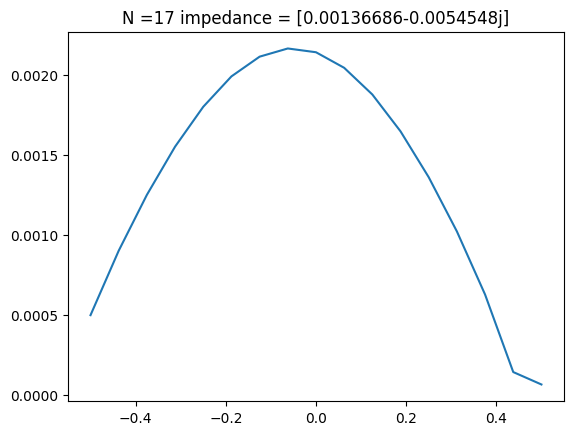

****************
(19, 1)
(19, 1)
********************


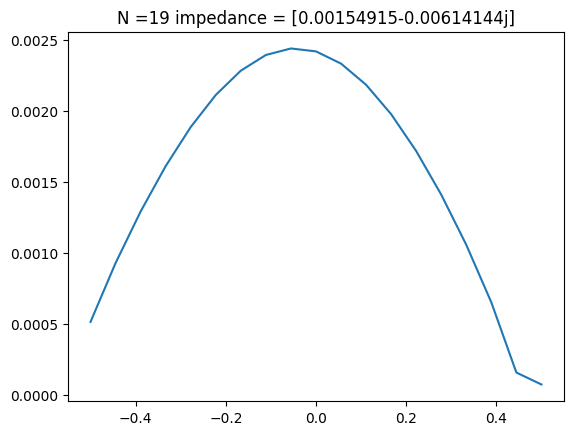

In [252]:
for i in range(0,10):
  L,M,N,a = 1, 1+i*2,1+i*2,0.001
  mom = Mom(L,M,N,a)
  I1,impedance, z = mom.solve()
  plt.plot(z, I1)
  plt.title("N ={} impedance = {}".format(N, impedance[0]))
  plt.show()


z_mn = impedance_matrix()
v_m = V()
I1 = np.linalg.solve(z_mn, v_m)

****************
(101, 1)
(101, 1)
********************


<ipython-input-251-40b59c7189d4>:73: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.impedance = np.linalg.lstsq(one,self.I)


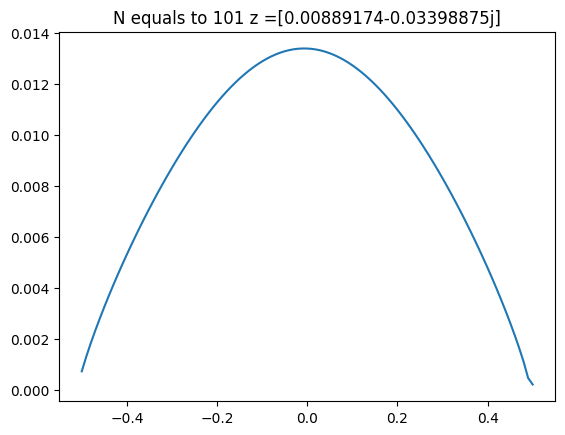

In [253]:
L,M,N,a = 1, 101,101,0.001
mom = Mom(L,M,N,a)
I1,impedance, z = mom.solve()
plt.plot(z, I1)
plt.title("N equals to {} z ={}".format(N, impedance[0]))
plt.show()

In [ ]:
print(mom.get_impedance)